<p style="text-align:center">
    <a href="https://www.linkedin.com/company/galois-insights-limited/" target="_blank">
    <img src="https://drive.google.com/uc?export=view&id=1V_W0UD5Ihsi9VjZEsFvLoAC2mnzd5sKN" width="300" alt="Galois Insights Limited Logo"  />   
    <center>iAnalyse Mentorship Program<center>
    <center>Group 4<center>
    </a>
</p>

# Diabetes Prediction Balenced dataset

#### Problem Statement for Diabetes Prediction
Diabetes is a prevalent and chronic metabolic disorder that affects individuals across
various demographic segments. Early detection is pivotal for timely intervention and tailored
medical guidance. 
#### Project Objective
Leveraging a dataset encompassing diverse patient information (age, gender, pregnancy history, glucose levels, blood pressure, skinthickness, insulin levels, BMI (Body Mass Index), diabetes pedigree function, hypertension,
heart disease, smoking history, and HbA1c levels), our goal is to develop a
predictive model capable of discerning individuals who are at risk of developing diabetes 

#### Hypothesis Generation

After looking at the problem statement, we will now move into hypothesis generation. 
It is the process of listing out all the possible factors that can affect the target.

Hypothesis 1 : Women are more likely to have diabetes than men.

Hypothesis 2 : Older individuals are more likely to have diabetes.

Hypothesis 3 : The number of pregnancies is positively correlated with diabetes risk.
    
Hypothesis 4 : High levels of Glucose are associated with a higher risk of diabetes.

Hypothesis 5 : Individuals with higher BMI are more likely to have diabetes.


#### Getting the System Ready and Loading the Data

In [45]:
#imports and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings               # To ignore any warnings
warnings.filterwarnings("ignore")
df= pd.read_csv("D:/iAnalayse_mentorship/Mini_Project_G4/diabetes.csv")

df

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
0,Female,80.0,6,148,72,35,0,33.6,0.627,0,1,never,6.6,1
1,Female,54.0,1,85,66,29,0,26.6,0.351,0,0,No Info,6.6,0
2,Male,28.0,0,183,64,0,0,23.3,0.672,0,0,never,5.7,1
3,Female,36.0,1,89,66,23,94,28.1,0.167,0,0,current,5.0,0
4,Male,76.0,0,137,40,35,168,43.1,2.288,1,1,current,4.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Female,66.0,10,101,76,48,180,32.9,0.171,0,0,former,5.7,0
764,Male,15.0,0,122,70,27,0,36.8,0.340,0,0,never,3.5,0
765,Female,21.0,5,121,72,23,112,26.2,0.245,0,0,ever,3.5,0
766,Female,23.0,1,126,60,0,0,30.1,0.349,0,0,never,6.0,1


## 1) Understanding the Data

#### Display Top 5 Rows of The Dataset

In [46]:
df.head(5)

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
0,Female,80.0,6,148,72,35,0,33.6,0.627,0,1,never,6.6,1
1,Female,54.0,1,85,66,29,0,26.6,0.351,0,0,No Info,6.6,0
2,Male,28.0,0,183,64,0,0,23.3,0.672,0,0,never,5.7,1
3,Female,36.0,1,89,66,23,94,28.1,0.167,0,0,current,5.0,0
4,Male,76.0,0,137,40,35,168,43.1,2.288,1,1,current,4.8,1


#### Check Last 5 Rows of The Dataset

In [47]:
df.tail(5)

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
763,Female,66.0,10,101,76,48,180,32.9,0.171,0,0,former,5.7,0
764,Male,15.0,0,122,70,27,0,36.8,0.340,0,0,never,3.5,0
765,Female,21.0,5,121,72,23,112,26.2,0.245,0,0,ever,3.5,0
766,Female,23.0,1,126,60,0,0,30.1,0.349,0,0,never,6.0,1
767,Male,5.0,0,93,70,31,0,30.4,0.315,0,0,No Info,5.0,0


#### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [48]:
print("The Number of Rows in our Dataset is ", df.shape[0])
print("The Number of Columns in our Dataset is ", df.shape[1])

The Number of Rows in our Dataset is  768
The Number of Columns in our Dataset is  14


In [5]:
df.columns

Index(['gender', 'age', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'hypertension', 'heart_disease', 'smoking_history', 'HbA1c_level',
       'diabetes'],
      dtype='object')

We have 13 independents variables and 1 target variable, i.e, diabetes

#### Let's cheik the types of the variables

In [49]:
df.dtypes

gender                       object
age                         float64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
hypertension                  int64
heart_disease                 int64
smoking_history              object
HbA1c_level                 float64
diabetes                      int64
dtype: object

#### We can see there are three formats of data types:

###### object: Object format means variables are categorical. 
Categorical variables in our dataset are: gender, smoking_history 

###### int64: It represents the integer variables.
Integers variables in our dataset are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,hypertension ,heart_disease, diabetes  

###### float64: It represents the variable that has some decimal values involved. They are also numerical variables. 
Numerical variables in our dataset are:age, BMI,DiabetesPedigreeFunction, HbA1c_level.    

####  Check Null Values In The Dataset

In [50]:
df.isnull().sum()

gender                      0
age                         0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
hypertension                0
heart_disease               0
smoking_history             0
HbA1c_level                 0
diabetes                    0
dtype: int64

The inference we  get is that there are no missing values 
but that can not actually be a true story as in this particular dataset all the missing values 
were given the 0 as a value which is not good for the authenticity of the dataset. 

#### summary of the dataset

In [51]:
df.describe()

,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,HbA1c_level,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,41.258594,2.190104,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,0.070312,0.031250,5.586328,0.348958
std,22.955406,3.129171,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,0.255840,0.174106,1.117192,0.476951
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,0.000000,3.500000,0.000000
25%,22.000000,0.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,0.000000,0.000000,4.800000,0.000000
50%,42.000000,0.500000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,0.000000,0.000000,5.800000,0.000000
75%,59.000000,4.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,0.000000,0.000000,6.200000,1.000000
max,80.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000,1.000000,9.000000,1.000000


##### Oservation :
ln the above table , the min value of columns **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, **BMI**, **hypertension**, **heart disease** is zero (0).lt is clear that this values can't be zero.So we are
going to impute mean values of these respective columns instead of zero.

## Data cleaning

##### Drop the Duplicates

check is there any duplicate rows are exist or not , if exist then we shold remove from the dataframe.

In [52]:
# check the shape before drop the duplicates
print("The Number of Rows in our Dataset is ", df.shape[0])
print("The Number of Columns in our Dataset is ", df.shape[1])

The Number of Rows in our Dataset is  768
The Number of Columns in our Dataset is  14


In [53]:
df.drop_duplicates()

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
0,Female,80.0,6,148,72,35,0,33.6,0.627,0,1,never,6.6,1
1,Female,54.0,1,85,66,29,0,26.6,0.351,0,0,No Info,6.6,0
2,Male,28.0,0,183,64,0,0,23.3,0.672,0,0,never,5.7,1
3,Female,36.0,1,89,66,23,94,28.1,0.167,0,0,current,5.0,0
4,Male,76.0,0,137,40,35,168,43.1,2.288,1,1,current,4.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Female,66.0,10,101,76,48,180,32.9,0.171,0,0,former,5.7,0
764,Male,15.0,0,122,70,27,0,36.8,0.340,0,0,never,3.5,0
765,Female,21.0,5,121,72,23,112,26.2,0.245,0,0,ever,3.5,0
766,Female,23.0,1,126,60,0,0,30.1,0.349,0,0,never,6.0,1


In [54]:
# check the shape after drop the dupl icates
print("The Number of Rows in our Dataset is ", df.shape[0])
print("The Number of Columns in our Dataset is ", df.shape[1])

The Number of Rows in our Dataset is  768
The Number of Columns in our Dataset is  14


Before drop and after drop the duplicates the data set has same Shape which meanse no duplicates in the dataset.

#### Replace 0 value with mean

In [55]:
df['Glucose']= df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure']= df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness']= df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin']= df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI']= df['BMI'].replace(0, df['BMI'].mean())
df['hypertension']= df['hypertension'].replace(0, df['hypertension'].mean())
df['heart_disease']= df['heart_disease'].replace(0, df['heart_disease'].mean())

In [56]:
df.describe()

,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,HbA1c_level,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,41.258594,2.190104,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,0.135681,0.061523,5.586328,0.348958
std,22.955406,3.129171,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,0.237851,0.168665,1.117192,0.476951
min,0.080000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,0.070312,0.031250,3.500000,0.000000
25%,22.000000,0.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,0.070312,0.031250,4.800000,0.000000
50%,42.000000,0.500000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,0.070312,0.031250,5.800000,0.000000
75%,59.000000,4.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,0.070312,0.031250,6.200000,1.000000
max,80.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000,1.000000,9.000000,1.000000


## 3) Univariate Analysis

In this section, we will do a univariate analysis. It is the easiest form of analyzing data where we analyze each variable individually.

For categorical features, we can use frequency tables or bar plots to calculate the number of each category in a particular variable.

Probability Density Functions(PDF) can be used to look at the distribution of the numerical variables.

##### Target Variable

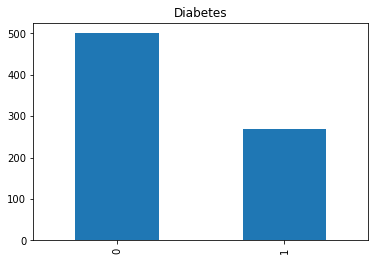

In [57]:
df['diabetes'].value_counts().plot.bar(title= 'Diabetes')
plt.show()

In [58]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [16]:
# Normalize can be set to True to print proportions instead of number
df['diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: diabetes, dtype: float64

268(around 35%) people out of 768 has the Diabet. In fact the number of patients who are diabetic is half of the patients who are non-diabetic.

This is an imbalenced dataset

##### Independent Variable (Categorical)

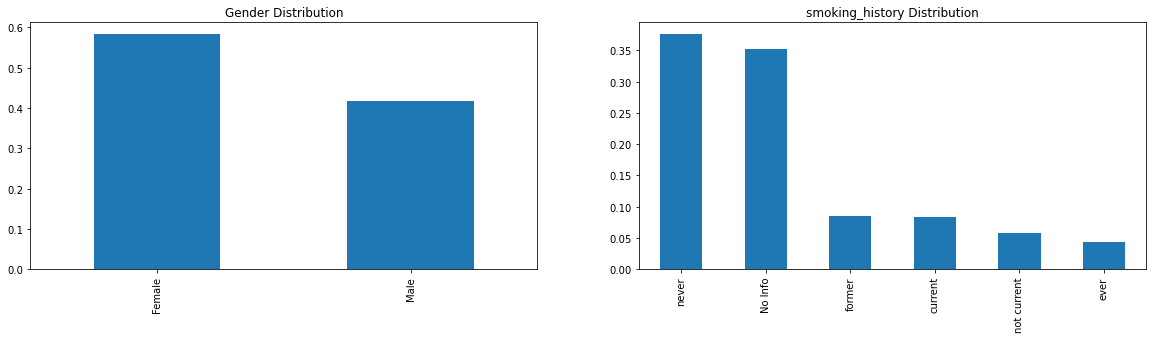

In [59]:
plt.figure(1) 
plt.subplot(221) 
df['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender Distribution') 
plt.subplot(222) 
df['smoking_history'].value_counts(normalize=True).plot.bar(title= 'smoking_history Distribution') 
plt.show()

It can be inferred from the above bar plots that:

58% of people in the dataset are Female.

Around 38% of the people in the dataset had never smoke.


##### Independent Variable (Numerical)

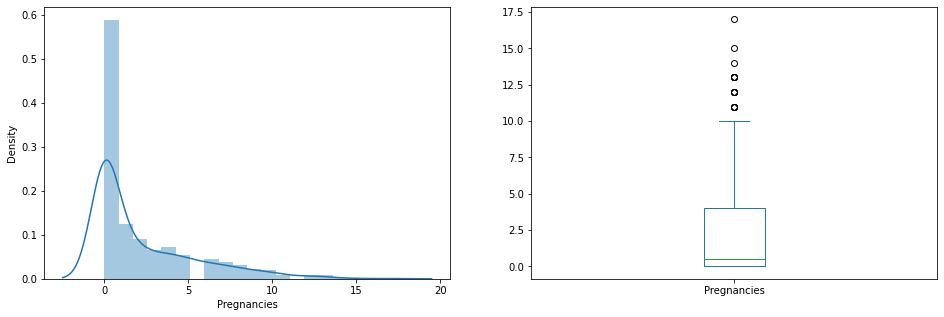

In [60]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['Pregnancies']); 
plt.subplot(122) 
df['Pregnancies'].plot.box(figsize=(16,5)) 
plt.show()

From the histogram of the 'Pregnancies' column, it is evident that the majority of data points
are concentrated towards the right side of the distribution. 

This skewness indicates that the data is not normally distributed.

We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

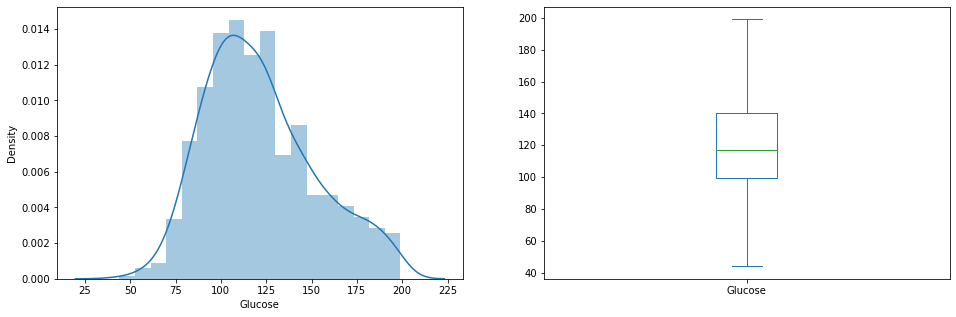

In [61]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['Glucose']); 
plt.subplot(122) 
df['Glucose'].plot.box(figsize=(16,5)) 
plt.show()

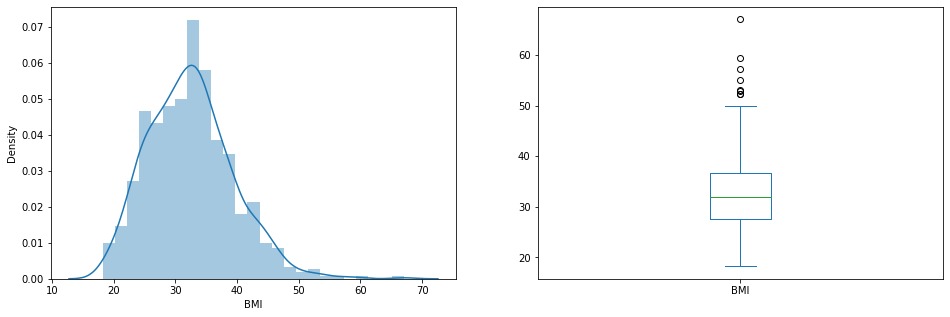

In [62]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['BMI']); 
plt.subplot(122) 
df['BMI'].plot.box(figsize=(16,5)) 
plt.show()

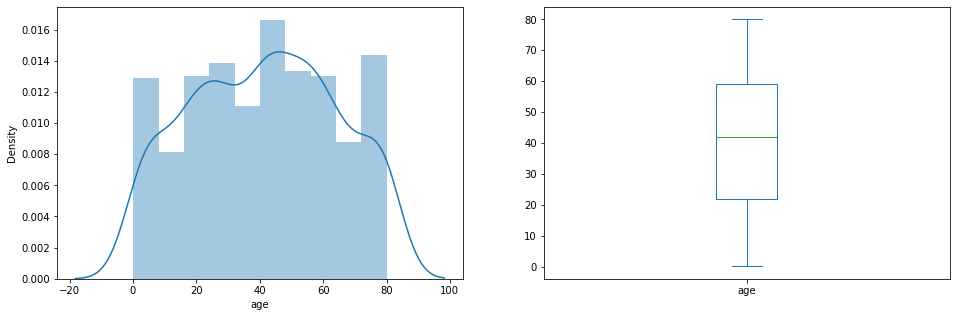

In [63]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['age']); 
plt.subplot(122) 
df['age'].plot.box(figsize=(16,5)) 
plt.show()

##### Bivariate Analysis
Now we would like to know how well each feature correlates with Diabete.

Let’s recall some of the hypotheses that we generated earlier

Hypothesis 1 : Women are more likely to have diabetes than men.

Hypothesis 2 : Older individuals are more likely to have diabetes.

Hypothesis 3 : The number of pregnancies is positively correlated with diabetes risk.
    
Hypothesis 4 : High levels of Glucose are associated with a higher risk of diabetes.

Hypothesis 5 : Individuals with higher BMI are more likely to have diabetes.

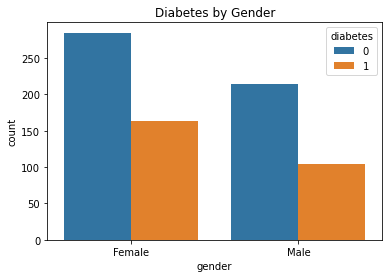

In [64]:
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Diabetes by Gender')
plt.show()

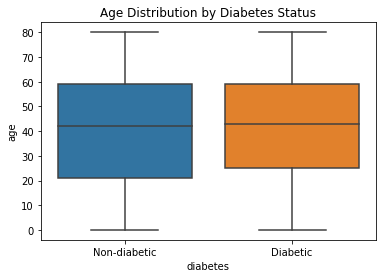

In [65]:
sns.boxplot(data=df, x='diabetes', y='age')
plt.title('Age Distribution by Diabetes Status')
plt.xticks([0,1],['Non-diabetic','Diabetic'],rotation=0)
plt.show()

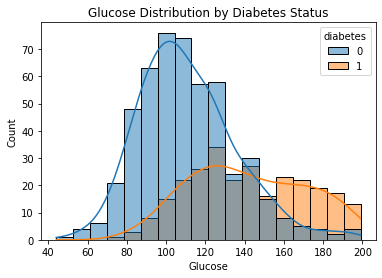

In [66]:
sns.histplot(data=df, x='Glucose', hue='diabetes', kde=True)
plt.title('Glucose Distribution by Diabetes Status')
plt.show()

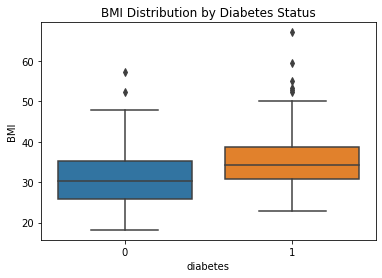

In [67]:
sns.boxplot(data=df, x='diabetes', y='BMI')
plt.title('BMI Distribution by Diabetes Status')
plt.show()

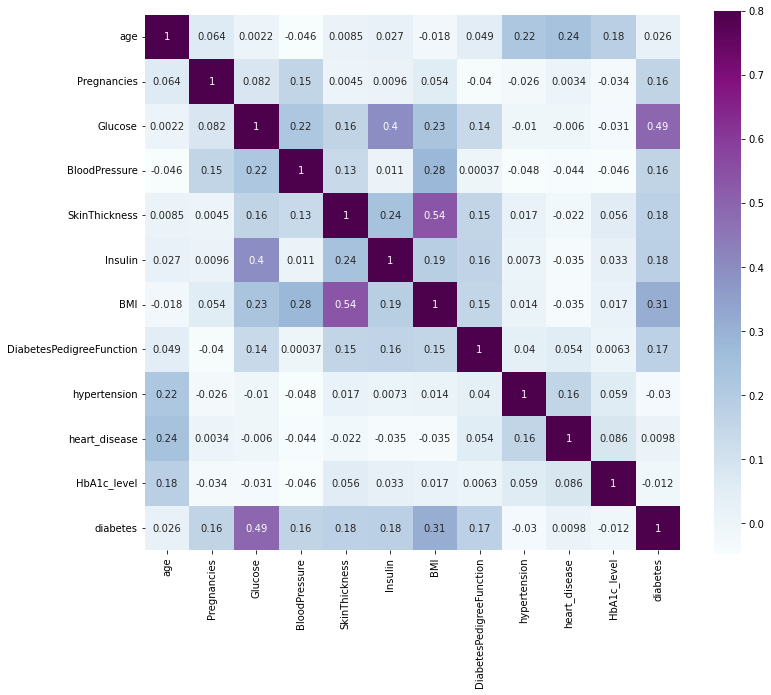

In [68]:
# Now let’s look at the correlation between all the variables.
matrix = df.corr()
f, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(matrix, annot=True,vmax=.8, square=True, cmap="BuPu")
plt.show()

##### Handling Categorical Columns

In [69]:
df.sample(5)

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
748,Female,60.0,3,187.0,70.0,22.000000,200.000000,36.4,0.408,0.070312,0.03125,never,4.8,1
500,Male,73.0,0,117.0,90.0,19.000000,71.000000,25.2,0.313,0.070312,0.03125,No Info,6.6,0
3,Female,36.0,1,89.0,66.0,23.000000,94.000000,28.1,0.167,0.070312,0.03125,current,5.0,0
368,Female,60.0,3,81.0,86.0,16.000000,66.000000,27.5,0.306,0.070312,0.03125,never,4.5,0
272,Male,69.0,0,122.0,78.0,20.536458,79.799479,23.0,0.254,0.070312,0.03125,No Info,6.5,0


In [70]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [71]:
df['gender']=df['gender'].map({'Female':0, 'Male':1}).astype('int')

In [72]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [73]:
df['smoking_history']=df['smoking_history'].map({'never':0, 'No Info':1,'current':2,'former':3,'ever':4, 'not current':5 }).astype('int')

In [74]:
df['smoking_history'].value_counts()

0    289
1    270
3     66
2     64
5     45
4     34
Name: smoking_history, dtype: int64

### Store Feature Matrix In X And Response (Target) In Vector y

In [75]:
X = df.drop('diabetes',axis=1)
X

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level
0,0,80.0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,0.070312,1.00000,0,6.6
1,0,54.0,1,85.0,66.0,29.000000,79.799479,26.6,0.351,0.070312,0.03125,1,6.6
2,1,28.0,0,183.0,64.0,20.536458,79.799479,23.3,0.672,0.070312,0.03125,0,5.7
3,0,36.0,1,89.0,66.0,23.000000,94.000000,28.1,0.167,0.070312,0.03125,2,5.0
4,1,76.0,0,137.0,40.0,35.000000,168.000000,43.1,2.288,1.000000,1.00000,2,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,66.0,10,101.0,76.0,48.000000,180.000000,32.9,0.171,0.070312,0.03125,3,5.7
764,1,15.0,0,122.0,70.0,27.000000,79.799479,36.8,0.340,0.070312,0.03125,0,3.5
765,0,21.0,5,121.0,72.0,23.000000,112.000000,26.2,0.245,0.070312,0.03125,4,3.5
766,0,23.0,1,126.0,60.0,20.536458,79.799479,30.1,0.349,0.070312,0.03125,0,6.0


In [76]:
y = df['diabetes']
y 

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

### Data Standardization

In [77]:
df.sample(5)

,gender,age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes
517,1,48.0,0,125.0,86.0,20.536458,79.799479,37.6,0.304,0.070312,0.03125,0,4.8,0
46,0,29.0,1,146.0,56.0,20.536458,79.799479,29.7,0.564,0.070312,0.03125,0,5.0,0
279,1,14.0,0,108.0,62.0,10.000000,278.000000,25.3,0.881,0.070312,0.03125,1,6.6,0
596,1,10.0,0,67.0,76.0,20.536458,79.799479,45.3,0.194,0.070312,0.03125,5,4.0,0
723,0,46.0,5,117.0,86.0,30.000000,105.000000,39.1,0.251,0.070312,0.03125,1,3.5,0


In [78]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_res=st.fit_transform(X)

In [79]:
X_res

array([[-0.84515425,  1.68878099,  1.21833484, ...,  5.56776436,
        -0.86426805,  0.90793031],
       [-0.84515425,  0.55541207, -0.3805735 , ..., -0.1796053 ,
        -0.17068617,  0.90793031],
       [ 1.18321596, -0.57795685, -0.70035516, ..., -0.1796053 ,
        -0.86426805,  0.10181415],
       ...,
       [-0.84515425, -0.88309464,  0.89855318, ..., -0.1796053 ,
         1.91005949, -1.86869202],
       [-0.84515425, -0.79591241, -0.3805735 , ..., -0.1796053 ,
        -0.86426805,  0.37051954],
       [ 1.18321596, -1.58055243, -0.70035516, ..., -0.1796053 ,
        -0.17068617, -0.52516509]])

### Varience Inflation Factor (VIF)

VIF determines the strength Of the correlation between the independent variables.

VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF starts at 1 and has no upper limit

VIF = 1, no correlation between the independent variable and the other variables

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_res, i) for i in range(X_res.shape[1])]
vif["Features"] = X.columns

# Let's check the VIF values
print(vif)


         VIF                  Features
0   1.596511                    gender
1   1.167298                       age
2   1.623563               Pregnancies
3   1.289826                   Glucose
4   1.180005             BloodPressure
5   1.457463             SkinThickness
6   1.263942                   Insulin
7   1.543928                       BMI
8   1.066207  DiabetesPedigreeFunction
9   1.072626              hypertension
10  1.102552             heart_disease
11  1.056674           smoking_history
12  1.046597               HbA1c_level


### Do data balanceing

#### Over Sampling Technique

This technique is used to modify the unequal data classes to create balanced datasets. When the quantity of data is insufficient, the oversampling method tries to balance by incrementing the size of rare samples.

Oversampling techniques for classification problems

1.	Random Oversampling

2.	Synthetic Minority Oversampling Technique (SMOTE)

3.	Adaptive Synthetic Sampling (ADASYN)



**SMOTE (Synthetic Minority Oversampling Technique)**

SMOTE works by utilizing a k-nearest neighbor algorithm to create synthetic data. ln this technique, the minority class is over-sampled by producing synthetic examples rather than by over-sampling with replacement and for each minority class observation


In [81]:
pip install imbalanced-learn --user


Note: you may need to restart the kernel to use updated packages.


In [82]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X_res, y_res = oversample.fit_resample(X_res,y)

In [83]:
X_res.shape, y_res.shape

((1000, 13), (1000,))

In [84]:
y.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [85]:
y_res.value_counts()

1    500
0    500
Name: diabetes, dtype: int64

#### observe that data has been balanced

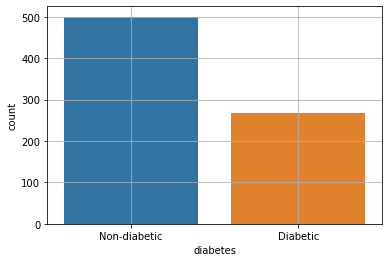

In [86]:
# Before Over Sampling Technique
sns.countplot(df['diabetes'])
plt.xticks([0,1],['Non-diabetic','Diabetic'],rotation=0)
plt.grid()
plt.show()

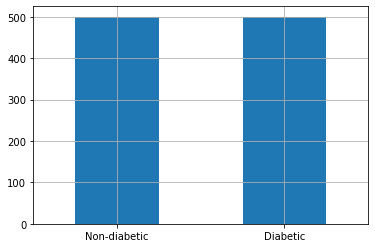

In [87]:
# Afeter Over Sampling Technique
pd.Series(y_res).value_counts().plot.bar()
plt.xticks([0,1],['Non-diabetic','Diabetic'],rotation=0)
plt.grid()

### Train Test Split

In [88]:
# Function for splitting training and train set 
from sklearn.model_selection import train_test_split
# Split X and Y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=7)

In [89]:
X_train.shape, y_train.shape

((800, 13), (800,))

In [90]:
X_test.shape, y_test.shape

((200, 13), (200,))

# Model Building:

#### Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

##### Model Evaluation of Decision Tree Classifier

In [92]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [93]:
print("Train accuracy", accuracy_score(y_train,dt_train_pred)*100)

Train accuracy 100.0


In [94]:
print("Test accuracy", accuracy_score(y_test,dt_test_pred)*100)

Test accuracy 75.5


##### Confusion Matrix of Decision Tree Classifier

Confusion metrics is a table which is used to describe the performance of a classification problem.
It visualizes the accuracy of a classifier by comparing predicted values with actual values.
The terms used in confusion metrics are True positive (TP), true negative (TN), false positive (FP) and false negative (FN)
True Positive: The predicted result is positive, while it is labeled as positive.

False Posltlve: The predicted resuit is positive, while it is labeled as negative. It calls Type I Error as well.

False Negative: The predicted result is negative, white it is labeled as positive. It calls Type Il Error as well.

True Negatlve: The predicted result negative, while it is labeled as negative.

In [95]:
# print confusion matrix
print("Confusion Matrix\n", confusion_matrix(y_test,dt_test_pred))

Confusion Matrix
 [[71 21]
 [28 80]]


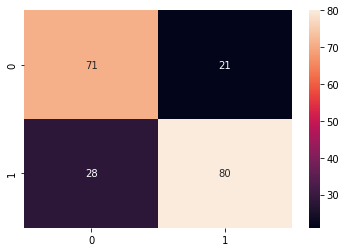

In [96]:
sns.heatmap( confusion_matrix(y_test,dt_test_pred), annot=True)
plt.show()

##### Classification report of Decision Tree Classifier

In [97]:
# print confusion matrix
print("Classification report\n", classification_report(y_test,dt_test_pred,digits=2))

Classification report
               precision    recall  f1-score   support

           0       0.72      0.77      0.74        92
           1       0.79      0.74      0.77       108

    accuracy                           0.76       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200



##### ROC Curve & ROC AUC

ROC curve is one the important evaluating metrics that should be used to check the performance of an classification model.lt is also called relative operating
characteristic curve, because it is a comparison of two main characteristics (TPR and FPR). It is plotted between sensitivity(aka recall aka True Positive Rate) and False Positive Rate(FPR = 1-specificity).

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no).
Area Under Curve (AUC) helps us to choose the best model amongst the models for which we have plotted the ROC curves

In [140]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test,dt_test_pred)*100,2)
print('roc_auc_score of dt',auc)

roc_auc_score of dt 75.62


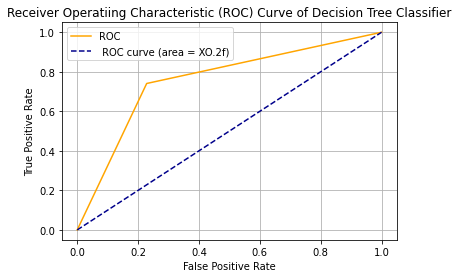

In [141]:
from sklearn.metrics import roc_curve
fpc, tpr, thresholds = roc_curve(y_test,dt_test_pred)
plt.plot(fpc,tpr, color = 'orange', label = 'ROC')
plt.plot([0,1], [0,1], color ='darkblue', linestyle ='--',label=' ROC curve (area = XO.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operatiing Characteristic (ROC) Curve of Decision Tree Classifier')
plt.legend()
plt.grid()
plt.show()

#### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

##### Model Evaluation of Logistic Regression

In [99]:
print("Train accuracy", accuracy_score(y_train,lr_train_pred)*100)

Train accuracy 77.75


In [100]:
print("Test accuracy", accuracy_score(y_test,lr_test_pred)*100)

Test accuracy 73.0


##### Confusion Matrix of Logistic Regression

In [101]:
# print confusion matrix
print("Confusion Matrix\n", confusion_matrix(y_test,lr_test_pred))

Confusion Matrix
 [[70 22]
 [32 76]]


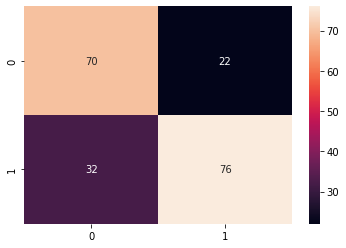

In [102]:
sns.heatmap( confusion_matrix(y_test,lr_test_pred), annot=True)
plt.show()

##### Classification report of Logistic Regression

In [103]:
# print confusion matrix
print("Classification report\n", classification_report(y_test,lr_test_pred,digits=2))

Classification report
               precision    recall  f1-score   support

           0       0.69      0.76      0.72        92
           1       0.78      0.70      0.74       108

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



##### ROC Curve & ROC AUC of Logistic Regression

In [142]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test,lr_test_pred)*100,2)
print('roc_auc_score of lr',auc)

roc_auc_score of lr 73.23


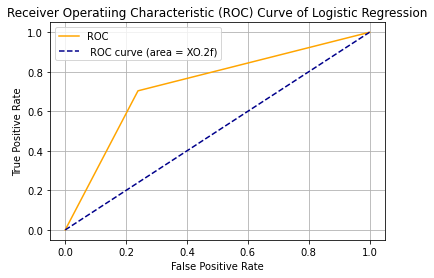

In [143]:
from sklearn.metrics import roc_curve
fpc, tpr, thresholds = roc_curve(y_test,lr_test_pred)
plt.plot(fpc,tpr, color = 'orange', label = 'ROC')
plt.plot([0,1], [0,1], color ='darkblue', linestyle ='--',label=' ROC curve (area = XO.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operatiing Characteristic (ROC) Curve of Logistic Regression')
plt.legend()
plt.grid()
plt.show()

#### Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)

RFC_train_pred = RFC.predict(X_train)
RFC_test_pred = RFC.predict(X_test)

##### Model Evalution of Random Forest Classifier

In [145]:
print("Train accuracy", accuracy_score(y_train,RFC_train_pred)*100)

Train accuracy 100.0


In [146]:
print("Test accuracy", accuracy_score(y_test,RFC_test_pred)*100)

Test accuracy 79.5


##### Confusion Matrix of Random Forest Classifier

In [147]:
# print confusion matrix
print("Confusion Matrix\n", confusion_matrix(y_test,RFC_test_pred))

Confusion Matrix
 [[76 16]
 [25 83]]


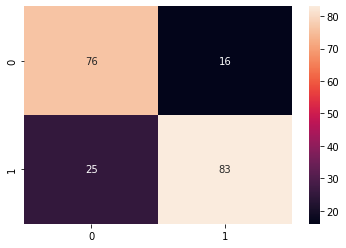

In [148]:
sns.heatmap( confusion_matrix(y_test,RFC_test_pred), annot=True)
plt.show()

##### Classification report of Random Forest Classifier

In [172]:
# print confusion matrix
print("Classification report\n", classification_report(y_test,RFC_test_pred,digits=2))

Classification report
               precision    recall  f1-score   support

           0       0.75      0.83      0.79        92
           1       0.84      0.77      0.80       108

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200



##### ROC Curve & ROC AUC of Random Forest Classifier

In [150]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test,RFC_test_pred)*100,2)
print('roc_auc_score of RFC',auc)

roc_auc_score of RFC 79.73


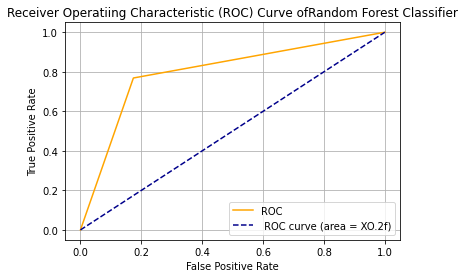

In [151]:
from sklearn.metrics import roc_curve
fpc, tpr, thresholds = roc_curve(y_test,RFC_test_pred)
plt.plot(fpc,tpr, color = 'orange', label = 'ROC')
plt.plot([0,1], [0,1], color ='darkblue', linestyle ='--',label=' ROC curve (area = XO.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operatiing Characteristic (ROC) Curve ofRandom Forest Classifier')
plt.legend()
plt.grid()
plt.show()

#### SVC

In [153]:
from sklearn import svm
svc = svm.SVC()

svc.fit(X_train, y_train)

svc_train_pred = svc.predict(X_train)
svc_test_pred =svc.predict(X_test)

##### Model Evaluation of SVC

In [154]:
print("Train accuracy", accuracy_score(y_train,svc_train_pred)*100)

Train accuracy 82.625


In [155]:
print("Test accuracy", accuracy_score(y_test,svc_test_pred)*100)

Test accuracy 79.0


##### Confusion matrix of SVC

In [156]:
# print confusion matrix
print("Confusion Matrix\n", confusion_matrix(y_test,svc_test_pred))

Confusion Matrix
 [[72 20]
 [22 86]]


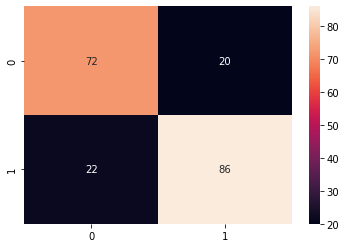

In [157]:
sns.heatmap( confusion_matrix(y_test,svc_test_pred), annot=True)
plt.show()

##### Classification report of SVC

In [158]:
# print confusion matrix
print("Classification report\n", classification_report(y_test,svc_test_pred,digits=2))

Classification report
               precision    recall  f1-score   support

           0       0.77      0.78      0.77        92
           1       0.81      0.80      0.80       108

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



##### ROC Curve & ROC AUC of SVC

In [159]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test,svc_test_pred)*100,2)
print('roc_auc_score of svc',auc)

roc_auc_score of svc 78.95


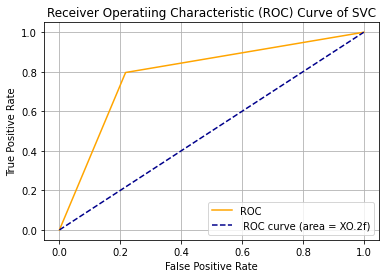

In [160]:
from sklearn.metrics import roc_curve
fpc, tpr, thresholds = roc_curve(y_test,svc_test_pred)
plt.plot(fpc,tpr, color = 'orange', label = 'ROC')
plt.plot([0,1], [0,1], color ='darkblue', linestyle ='--',label=' ROC curve (area = XO.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operatiing Characteristic (ROC) Curve of SVC')
plt.legend()
plt.grid()
plt.show()

#### Gradient Boosting Classifier

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
GBC =GradientBoostingClassifier()

GBC.fit(X_train, y_train)

GBC_train_pred = GBC.predict(X_train)
GBC_test_pred = GBC.predict(X_test)

###### Model Evaluation of Gradient Boosting Classifier

In [163]:
print("Train accuracy", accuracy_score(y_train,GBC_train_pred)*100)

Train accuracy 92.75


In [164]:
print("Test accuracy", accuracy_score(y_test,GBC_test_pred)*100)

Test accuracy 78.0


##### Confusion matrix of Gradient Boosting Classifier

In [165]:
# print confusion matrix
print("Confusion Matrix\n", confusion_matrix(y_test,GBC_test_pred))

Confusion Matrix
 [[73 19]
 [25 83]]


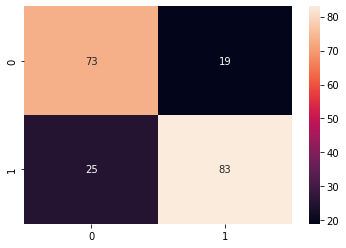

In [166]:
sns.heatmap( confusion_matrix(y_test,GBC_test_pred), annot=True)
plt.show()

##### Classification report of Gradient Boosting Classifier

In [168]:
print("Classification report\n", classification_report(y_test,GBC_test_pred,digits=2))

Classification report
               precision    recall  f1-score   support

           0       0.74      0.79      0.77        92
           1       0.81      0.77      0.79       108

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



##### ROC Curve & ROC AUC of Gradient Boosting Classifier

In [169]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test,GBC_test_pred)*100,2)
print('roc_auc_score of GBC',auc)

roc_auc_score of GBC 78.1


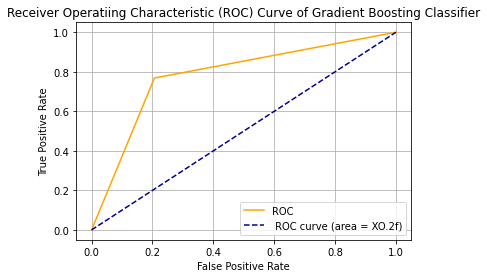

In [170]:
from sklearn.metrics import roc_curve
fpc, tpr, thresholds = roc_curve(y_test,GBC_test_pred)
plt.plot(fpc,tpr, color = 'orange', label = 'ROC')
plt.plot([0,1], [0,1], color ='darkblue', linestyle ='--',label=' ROC curve (area = XO.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operatiing Characteristic (ROC) Curve of Gradient Boosting Classifier')
plt.legend()
plt.grid()
plt.show()

### Precison

#### Logistic Regresion

In [173]:
from sklearn.metrics import precision_score
print("precision score of macro is:", round(precision_score(y_test, lr_test_pred, average='macro') * 100, 2))
print("precision score of micro is:", round(precision_score(y_test, lr_test_pred, average='micro') * 100, 2))
print("precision score of weighted is:", round(precision_score(y_test, lr_test_pred, average='weighted') * 100, 2))


precision score of macro is: 73.09
precision score of micro is: 73.0
precision score of weighted is: 73.45


#### SVC

In [174]:
from sklearn.metrics import precision_score
print("precision score of macro is:", round(precision_score(y_test, svc_test_pred, average='macro') * 100, 2))
print("precision score of micro is:", round(precision_score(y_test, svc_test_pred, average='micro') * 100, 2))
print("precision score of weighted is:", round(precision_score(y_test, svc_test_pred, average='weighted') * 100, 2))


precision score of macro is: 78.86
precision score of micro is: 79.0
precision score of weighted is: 79.05


#### Decison Tree Classifier

In [175]:
from sklearn.metrics import precision_score
print("precision score of macro is:", round(precision_score(y_test, dt_test_pred, average='macro') * 100, 2))
print("precision score of micro is:", round(precision_score(y_test, dt_test_pred, average='micro') * 100, 2))
print("precision score of weighted is:", round(precision_score(y_test, dt_test_pred, average='weighted') * 100, 2))


precision score of macro is: 75.46
precision score of micro is: 75.5
precision score of weighted is: 75.76


#### Random Forest  Classifier 

In [136]:
from sklearn.metrics import precision_score
print("precision score of macro is:", round(precision_score(y_test, RFC_test_pred, average='macro') * 100, 2))
print("precision score of micro is:", round(precision_score(y_test, RFC_test_pred, average='micro') * 100, 2))
print("precision score of weighted is:", round(precision_score(y_test, RFC_test_pred, average='weighted') * 100, 2))


precision score of macro is: 79.89
precision score of micro is: 80.0
precision score of weighted is: 80.11


#### Gradient Boosting Classifier

In [177]:
from sklearn.metrics import precision_score
print("precision score of macro is:", round(precision_score(y_test, GBC_test_pred, average='macro') * 100, 2))
print("precision score of micro is:", round(precision_score(y_test, GBC_test_pred, average='micro') * 100, 2))
print("precision score of weighted is:", round(precision_score(y_test, GBC_test_pred, average='weighted') * 100, 2))


precision score of macro is: 77.93
precision score of micro is: 78.0
precision score of weighted is: 78.21


### F1_Score

#### Logistic Regresion

In [178]:
from sklearn.metrics import f1_score
print("f1_score of macro is:", round(f1_score(y_test, lr_test_pred, average='macro') * 100, 2))
print("f1_score score of micro is:", round(f1_score(y_test, lr_test_pred, average='micro') * 100, 2))
print("f1_score score of weighted is:", round(f1_score(y_test, lr_test_pred, average='weighted') * 100, 2))


f1_score of macro is: 72.98
f1_score score of micro is: 73.0
f1_score score of weighted is: 73.04


#### SVC

In [179]:
from sklearn.metrics import f1_score
print("f1_score of macro is:", round(f1_score(y_test, svc_test_pred, average='macro') * 100, 2))
print("f1_score score of micro is:", round(f1_score(y_test, svc_test_pred, average='micro') * 100, 2))
print("f1_score score of weighted is:", round(f1_score(y_test, svc_test_pred, average='weighted') * 100, 2))


f1_score of macro is: 78.9
f1_score score of micro is: 79.0
f1_score score of weighted is: 79.01


##### Decison Tree Classifier

In [180]:
from sklearn.metrics import f1_score
print("f1_score of macro is:", round(f1_score(y_test, dt_test_pred, average='macro') * 100, 2))
print("f1_score score of micro is:", round(f1_score(y_test, dt_test_pred, average='micro') * 100, 2))
print("f1_score score of weighted is:", round(f1_score(y_test, dt_test_pred, average='weighted') * 100, 2))


f1_score of macro is: 75.45
f1_score score of micro is: 75.5
f1_score score of weighted is: 75.54


#### Random Forest Classifier

In [137]:
from sklearn.metrics import f1_score
print("f1_score of macro is:", round(f1_score(y_test, RFC_test_pred, average='macro') * 100, 2))
print("f1_score score of micro is:", round(f1_score(y_test, RFC_test_pred, average='micro') * 100, 2))
print("f1_score score of weighted is:", round(f1_score(y_test, RFC_test_pred, average='weighted') * 100, 2))


f1_score of macro is: 79.93
f1_score score of micro is: 80.0
f1_score score of weighted is: 80.02


#### Gradient Boosting Classifier 

In [181]:
from sklearn.metrics import f1_score
print("f1_score of macro is:", round(f1_score(y_test, GBC_test_pred, average='macro') * 100, 2))
print("f1_score score of micro is:", round(f1_score(y_test, GBC_test_pred, average='micro') * 100, 2))
print("f1_score score of weighted is:", round(f1_score(y_test, GBC_test_pred, average='weighted') * 100, 2))


f1_score of macro is: 77.94
f1_score score of micro is: 78.0
f1_score score of weighted is: 78.03


### Recall

#### Logistic Regression

In [190]:
from sklearn.metrics import recall_score
print("recall_score of macro is:", round(recall_score(y_test, lr_test_pred, average='macro') * 100, 2))
print("frecall_score of micro is:", round(recall_score(y_test, lr_test_pred, average='micro') * 100, 2))
print("recall_score of weighted is:", round(recall_score(y_test, lr_test_pred, average='weighted') * 100, 2))

recall_score of macro is: 73.23
frecall_score of micro is: 73.0
recall_score of weighted is: 73.0


#### SVC

In [189]:
from sklearn.metrics import recall_score
print("recall_score of macro is:", round(recall_score(y_test, svc_test_pred, average='macro') * 100, 2))
print("frecall_score  of micro is:", round(recall_score(y_test, svc_test_pred, average='micro') * 100, 2))
print("recall_score of weighted is:", round(recall_score(y_test, svc_test_pred, average='weighted') * 100, 2))

recall_score of macro is: 78.95
frecall_score  of micro is: 79.0
recall_score of weighted is: 79.0


#### Decision Tree Classifier

In [188]:
from sklearn.metrics import recall_score
print("recall_score of macro is:", round(recall_score(y_test, dt_test_pred, average='macro') * 100, 2))
print("recall_score of micro is:", round(recall_score(y_test, dt_test_pred, average='micro') * 100, 2))
print("recall_score of weighted is:", round(recall_score(y_test, dt_test_pred, average='weighted') * 100, 2))

recall_score of macro is: 75.62
recall_score of micro is: 75.5
recall_score of weighted is: 75.5


#### Random Forest Classifier

In [186]:
from sklearn.metrics import recall_score
print("recall_score of macro is:", round(recall_score(y_test, RFC_test_pred, average='macro') * 100, 2))
print("recall_score of micro is:", round(recall_score(y_test, RFC_test_pred, average='micro') * 100, 2))
print("recall_score of weighted is:", round(recall_score(y_test, RFC_test_pred, average='weighted') * 100, 2))

recall_score of macro is: 79.73
recall_score of micro is: 79.5
recall_score of weighted is: 79.5


#### Gradient Boosting Classifier 

In [191]:
from sklearn.metrics import recall_score
print("recall_score of macro is:", round(recall_score(y_test, GBC_test_pred, average='macro') * 100, 2))
print("recall_score of micro is:", round(recall_score(y_test, GBC_test_pred, average='micro') * 100, 2))
print("recall_score of weighted is:", round(recall_score(y_test, GBC_test_pred, average='weighted') * 100, 2))

recall_score of macro is: 78.1
recall_score of micro is: 78.0
recall_score of weighted is: 78.0


### Hyperparameters